In [3]:
import numpy as np 
from Option import Option
from Dynamic_programming import DynamicPricing
from Monte_carlo import MonteCarlo_simulator
from Black_Scholes import black_scholes
from collections import Counter

# Geometric Brownian Motion

## Monte carlo Simulations

In [4]:
r = 0.05
sigma = 0.02
S0 = 1
L = 5
n =1000
m = 50 
k=0.95

In [5]:
# Create Option object
call = Option(s0=S0, T=L, K=k, call=True)
payoff_0 = call.payoff(S0)

# Create instance of MonteCarlo_simulator
Simulation = MonteCarlo_simulator(S0, L, n,r=r,sigma=sigma,model_type="GBM")

# Simulate payoff
price_simulation = Simulation.monte_carlo_price_simulator()

payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff,price_simulation)

Visualising the monte carlo paths

In [6]:
Simulation.visualisation_price(price_simulation)

KeyboardInterrupt: 

## Dynamic Pricing

### Using Laguerre Basis

In [144]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 0.06048035779153607
Dynamic Pricing: 0.09049032000715163
Dynamic Pricing: 0.07013613601612197
Dynamic Pricing: 0.06007612948351488
Dynamic Pricing: 0.059938695982900206


### Using Polynomial Basis

In [33]:
for i in range(5):
    dynamic=DynamicPricing(S0, L, n,m,'poly',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)

Dynamic Pricing: 6.720785748746476
Dynamic Pricing: 6.690401455895467
Dynamic Pricing: 7.002018316245236
Dynamic Pricing: 6.772375621150038
Dynamic Pricing: 6.815581732516877


## Comparaison of the results with European option price using Black Scholes 

In [18]:
p=black_scholes(S0, k, L, r, sigma, option_type='call')
print("The price of european option is ",p)

The price of european option is  5.065047269372897


## Optimal Exercise Boundary
 Verify that the dynamic programming algorithm accurately identifies the optimal exercise boundary, i.e., the boundary at which it is optimal to exercise the option rather than holding it. This boundary should be consistent with theoretical expectations and market conditions.

In [1]:
r = 0.05
sigma = 0.1
S0 = 100
L = 10
n =1000
m = 50 
k=95

In [129]:
data=[]
for i in range(100):
    dynamic=DynamicPricing(S0, L, n,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,tau=dynamic.dynamic_prog_price()
    # Compte la fréquence de chaque élément dans la liste
    counts = Counter(tau)
    # Trouve la valeur avec la fréquence maximale
    optimal_Tau, _ = counts.most_common(1)[0]
    data.append(optimal_Tau)
    print("option's exercise time:", optimal_Tau)

option's exercise time: 2.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 5.0
option's exercise time: 3.0
option's exercise time: 1.0
option's exercise time: 3.0
option's exercise time: 3.0
option's exercise time: 2.0
option's exercise time: 3.0
option's exercise time: 3.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 2.0
option's exercise time: 4.0
option's exercise time: 3.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 2.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 2.0
option's exercise time: 2.0
option's exercise time: 2.0
option's exercise time: 1.0
option's exercise time: 1.0
option's exercise time: 3.0
option's exercise time: 1.0
option's exercise time: 2.0
option's exercise time: 1.0
option's exercise ti

5.0


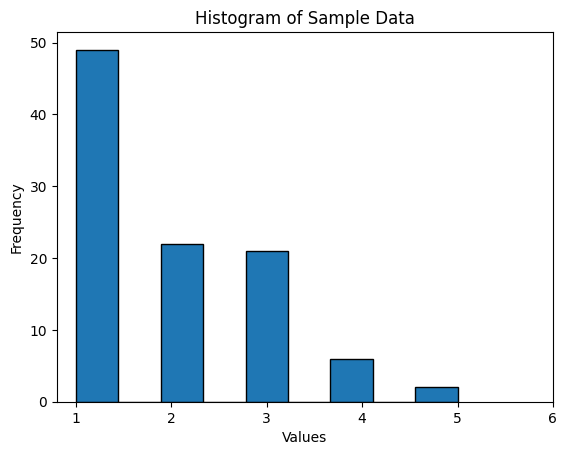

In [130]:
import matplotlib.pyplot as plt
# Determine the range of the data
data_min = min(data)
data_max = max(data)
print(data_max - data_min + 1)
# Plot histogram
plt.hist(data, bins=9,  edgecolor='black')
plt.title('Histogram of Sample Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(range(int(data_min), 7))  # Adjust x-axis ticks to align with integer values
plt.show()

Observing that executing the option early, particularly before day 4 or 5, appears optimal, especially for a maturity of 10, underscores the significance of our findings. To further substantiate the precision and effectiveness of our dynamic programming approach, we aim to validate it against benchmark datasets featuring established exercise boundaries and option prices.

## Convergence of the algorithm

In [140]:
prices=[]
for i in range(1,100):
    dynamic=DynamicPricing(S0, L, i*100,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,_=dynamic.dynamic_prog_price()
    prices.append(u)
    print("option price:", u)

option price: 99.92488232887517
option price: 101.1742704164956
option price: 99.66092645094221
option price: 99.84012285585574
option price: 99.41273874952205
option price: 99.44495104953836
option price: 99.53675537148288
option price: 101.14954638761488
option price: 99.8855269621624
option price: 99.41428071773322
option price: 99.55331538367516
option price: 99.50395097029923
option price: 100.20165322361838
option price: 99.68456100995313
option price: 99.57509811125917
option price: 100.4407326663325
option price: 100.09413041928855
option price: 100.1653564146468
option price: 99.66671505236508
option price: 99.48033804623341
option price: 99.60949176689
option price: 99.57239463398291
option price: 99.56934657120804
option price: 99.49516081552787
option price: 99.56620167359084
option price: 99.60364663474058
option price: 99.57810275065538
option price: 100.15600820196974
option price: 99.52437671249574
option price: 99.59616719363918
option price: 99.54445321142421
option p

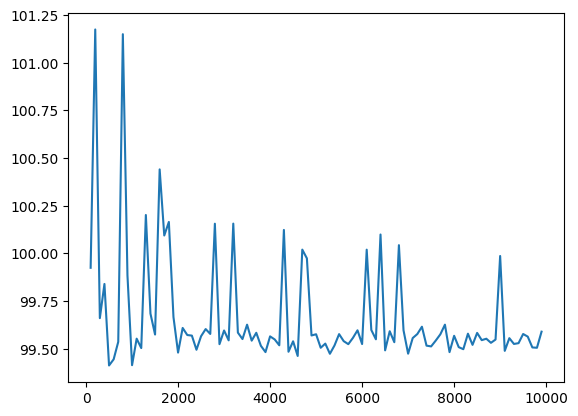

In [142]:
X=[i*100 for i in range(1,100)]
plt.plot(X,prices)
plt.show()

We can see that the algorithm converges as n takes larger values

## Sensitivity analysis

### Volatility

In [ ]:
eps=0.01
r = 0.05
sigma = 0.1
S0 = 100
L = 10
n =1000
m = 50 
k=95

In [2]:

dynamic=DynamicPricing(S0, L, 8000,m,'Laguerre',call.payoff,r=r,sigma=sigma,model_type="GBM")
u,_=dynamic.dynamic_prog_price()
print("option price:", u)

NameError: name 'DynamicPricing' is not defined